# **Image Classification of Indian Food with Transformers**


## ImageFolder


In [8]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 262.6 kB/s eta 0:00:08
   - -------------------------------------- 0.1/2.1 MB 393.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/2.1 MB 547.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.1 MB 655.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/2.1 MB 689.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.1 MB 863.3 kB/s eta 0:00:03
   ------- -------------------------------- 0.4/2.1 MB 997.7 kB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.1 MB 1.

In [9]:
!pip install -q datasets transformers
import os

In [11]:
pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.4 kB 259.2 kB/s eta 0:00:01
   -------- ------------------------------ 30.7/139.4 kB 259.2 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/139.4 kB 357.2 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 467.6 kB/s eta 0:00:01
   ------------------------------------ - 133.1/139.4 kB 462.0 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 458.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   -------------------- ------------------- 112.6/215.0 kB 6.8 MB/s eta 0:00:01
   -------------------- ------------------- 112.6/215.0 kB 6.8 MB/s eta 0:00:01
   -------------------------- ------------- 143.4/215.0 kB 1.1 MB/s eta 0:0

In [12]:
from huggingface_hub import notebook_login

notebook_login()


Then you need to install Git-LFS to upload your model checkpoints:

In [ ]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

## Importing data into Hugging Face hub and datasets (optional)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/Data2/Food Classification.zip" -d /tmp/foodimg


Streaming output truncated to the last 5000 lines.
  inflating: /tmp/foodimg/chapati/253.jpg  
  inflating: /tmp/foodimg/chapati/254.jpg  
  inflating: /tmp/foodimg/chapati/255.jpg  
  inflating: /tmp/foodimg/chapati/256.jpg  
  inflating: /tmp/foodimg/chapati/257.jpg  
  inflating: /tmp/foodimg/chapati/258.jpg  
  inflating: /tmp/foodimg/chapati/259.jpg  
  inflating: /tmp/foodimg/chapati/260.jpg  
  inflating: /tmp/foodimg/chapati/261.jpg  
  inflating: /tmp/foodimg/chapati/262.jpg  
  inflating: /tmp/foodimg/chapati/263.jpg  
  inflating: /tmp/foodimg/chapati/264.jpg  
  inflating: /tmp/foodimg/chapati/265.jpg  
  inflating: /tmp/foodimg/chapati/266.jpg  
  inflating: /tmp/foodimg/chapati/267.jpg  
  inflating: /tmp/foodimg/chapati/268.jpg  
  inflating: /tmp/foodimg/chapati/269.jpg  
  inflating: /tmp/foodimg/chapati/270.jpg  
  inflating: /tmp/foodimg/chapati/271.jpg  
  inflating: /tmp/foodimg/chapati/272.jpg  
  inflating: /tmp/foodimg/chapati/273.jpg  
  inflating: /tmp/foodimg

We will use the [🤗 Datasets](https://github.com/huggingface/datasets) library's [ImageFolder](https://huggingface.co/docs/datasets/v2.0.0/en/image_process#imagefolder) feature to download our custom dataset into a DatasetDict.

In [ ]:
from datasets import load_dataset 
ds = load_dataset("imagefolder", data_dir="/tmp/foodimg")
ds = ds['train']

Resolving data files:   0%|          | 0/6271 [00:00<?, ?it/s]

Using custom data configuration default-ed008ccd80f367aa


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-ed008ccd80f367aa/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

I next want to randomly created a test split for validating the model

In [ ]:
data = ds.train_test_split(test_size=0.15)

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5328
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 941
    })
})

In [ ]:
data.push_to_hub("rajistics/indian_food_images")

Pushing split train to the Hub.


  0%|          | 0/6 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1951: FutureWarning: `identical_ok` has no effect and is deprecated. It will be removed in 0.11.0.
  FutureWarning,


Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

## Accessing the Indian Foods dataset from the public hub

In [ ]:
data = load_dataset("rajistics/indian_food_images")

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Using custom data configuration rajistics--indian_food_images-cfe7c00f44dbf4fc


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/rajistics___parquet/rajistics--indian_food_images-cfe7c00f44dbf4fc/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Let's look at a sample image

In [ ]:
ex = data['train'][400]
ex

In [ ]:
image = ex['image']
image

In [ ]:
labels = data['train'].features['label']
labels

ClassLabel(num_classes=20, names=['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa'], id=None)

In [ ]:
labels.int2str(ex['label'])

'paani_puri'

## Fine-tuning a model on an image classification task

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")

The `dataset` object itself is a [`DatasetDict`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasetdict), which contains one key per split (in this case, only "train" for a training split).

In [ ]:
data

DatasetDict({
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 941
    })
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5328
    })
})

In [ ]:
labels = data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

### Preprocessing the data

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

In [ ]:
# split up training into training + validation
train_ds = data['train']
val_ds = data['test']

In [ ]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

Let's access an element to see that we've added a "pixel_values" feature:

In [ ]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360 at 0x7FD911CAE650>,
 'label': 6,
 'pixel_values': tensor([[[-0.9608, -0.9529, -0.9529,  ..., -0.5686, -0.5373, -0.5294],
          [-0.9608, -0.9529, -0.9451,  ..., -0.5608, -0.6000, -0.6078],
          [-0.9843, -0.9843, -0.9765,  ..., -0.5451, -0.5608, -0.5216],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-0.9608, -0.9529, -0.9529,  ..., -0.7255, -0.6784, -0.6471],
          [-0.9608, -0.9529, -0.9451,  ..., -0.7020, -0.7176, -0.7098],
          [-0.9843, -0.9843, -0.9765,  ..., -0.7098, -0.7176, -0.6784],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, 

### Training the model

In [ ]:
from transformers import ViTForImageClassification
model_name_or_path = 'google/vit-base-patch16-224-in21k'
model = ViTForImageClassification.from_pretrained(
    model_name_or_path, 
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    'finetuned-indian-food',
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  load_best_model_at_end=True,
  hub_strategy="end"
)#

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

Then we just need to pass all of this along with our datasets to the `Trainer`:

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

Cloning https://huggingface.co/rajistics/finetuned-indian-food into local empty directory.


Download file pytorch_model.bin:   0%|          | 3.47k/327M [00:00<?, ?B/s]

Download file runs/Jul15_18-54-00_8efc67140cef/events.out.tfevents.1657911381.8efc67140cef.6046.6:   5%|5     …

Download file runs/Aug03_21-01-32_cab156e75ca5/1659560685.1088154/events.out.tfevents.1659560685.cab156e75ca5.…

Download file runs/Jul15_18-54-00_8efc67140cef/events.out.tfevents.1657911262.8efc67140cef.6046.4:  41%|####  …

Download file runs/Jul15_18-54-00_8efc67140cef/1657911262.2402825/events.out.tfevents.1657911262.8efc67140cef.…

Download file runs/Jul15_18-54-00_8efc67140cef/1657911381.133698/events.out.tfevents.1657911381.8efc67140cef.6…

Download file runs/Aug03_21-01-32_cab156e75ca5/events.out.tfevents.1659560685.cab156e75ca5.72.0:  55%|#####4  …

Clean file runs/Aug03_21-01-32_cab156e75ca5/1659560685.1088154/events.out.tfevents.1659560685.cab156e75ca5.72.…

Download file 003.jpg:   0%|          | 3.49k/1.87M [00:00<?, ?B/s]

Clean file runs/Jul15_18-54-00_8efc67140cef/1657911262.2402825/events.out.tfevents.1657911262.8efc67140cef.604…

Clean file runs/Jul15_18-54-00_8efc67140cef/1657911381.133698/events.out.tfevents.1657911381.8efc67140cef.6046…

Clean file runs/Jul15_18-54-00_8efc67140cef/events.out.tfevents.1657911262.8efc67140cef.6046.4:  23%|##2      …

Clean file runs/Jul15_18-54-00_8efc67140cef/events.out.tfevents.1657911381.8efc67140cef.6046.6:   3%|3        …

Clean file runs/Aug03_21-01-32_cab156e75ca5/events.out.tfevents.1659560685.cab156e75ca5.72.0:   3%|3         |…

Download file training_args.bin: 100%|##########| 3.23k/3.23k [00:00<?, ?B/s]

Download file runs/Jul15_18-54-00_8efc67140cef/events.out.tfevents.1657914945.8efc67140cef.6046.8: 100%|######…

Clean file training_args.bin:  31%|###       | 1.00k/3.23k [00:00<?, ?B/s]

Clean file runs/Jul15_18-54-00_8efc67140cef/events.out.tfevents.1657914945.8efc67140cef.6046.8: 100%|#########…

Download file runs/Aug03_21-01-32_cab156e75ca5/events.out.tfevents.1659562835.cab156e75ca5.72.2: 100%|########…

Clean file runs/Aug03_21-01-32_cab156e75ca5/events.out.tfevents.1659562835.cab156e75ca5.72.2: 100%|##########|…

Clean file 003.jpg:   0%|          | 1.00k/1.87M [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/327M [00:00<?, ?B/s]

Using cuda_amp half precision backend


Now we can finetune our model by calling the `train` method:

In [ ]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5328
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1332


Step,Training Loss,Validation Loss,Accuracy
100,1.179400,0.920808,0.856536
200,0.651300,0.540999,0.884166
300,0.590400,0.497848,0.879915
400,0.446100,0.366852,0.919235
500,0.563300,0.433989,0.884166
600,0.248900,0.335474,0.917109
700,0.317100,0.328614,0.919235
800,0.378500,0.323223,0.917109
900,0.227800,0.333829,0.919235
1000,0.089400,0.287036,0.924548


***** Running Evaluation *****
  Num examples = 941
  Batch size = 8
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
Saving model checkpoint to finetuned-indian-food/checkpoint-100
Configuration saved in finetuned-indian-food/checkpoint-100/config.json
Model weights saved in finetuned-indian-food/checkpoint-100/pytorch_model.bin
Feature extractor saved in finetuned-indian-food/checkpoint-100/preprocessor_config.json
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
***** Running Evaluation *****
  Num examples = 941
  Batch size = 8
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
Saving model checkpoint to finetuned-indian-food/c

Upload file pytorch_model.bin:   0%|          | 3.34k/327M [00:00<?, ?B/s]

Upload file runs/Aug04_18-07-39_26434d7bb3db/1659636699.575084/events.out.tfevents.1659636699.26434d7bb3db.71.…

Upload file runs/Aug04_18-07-39_26434d7bb3db/events.out.tfevents.1659636699.26434d7bb3db.71.0:  11%|#1        …

Upload file training_args.bin: 100%|##########| 3.23k/3.23k [00:00<?, ?B/s]

To https://huggingface.co/rajistics/finetuned-indian-food
   a1cbf3e..aeb260b  main -> main

To https://huggingface.co/rajistics/finetuned-indian-food
   aeb260b..3b64ca2  main -> main



***** train metrics *****
  epoch                    =          4.0
  total_flos               = 1538336014GF
  train_loss               =       0.4671
  train_runtime            =   0:26:57.22
  train_samples_per_second =       13.178
  train_steps_per_second   =        0.824


In [ ]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 941
  Batch size = 8


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =      0.933
  eval_loss               =     0.2632
  eval_runtime            = 0:00:37.39
  eval_samples_per_second =     25.167
  eval_steps_per_second   =      3.156


In [ ]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'indian_food_images',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

Saving model checkpoint to finetuned-indian-food
Configuration saved in finetuned-indian-food/config.json
Model weights saved in finetuned-indian-food/pytorch_model.bin
Feature extractor saved in finetuned-indian-food/preprocessor_config.json


Upload file runs/Aug04_18-07-39_26434d7bb3db/events.out.tfevents.1659638706.26434d7bb3db.71.2: 100%|##########…

To https://huggingface.co/rajistics/finetuned-indian-food
   3b64ca2..2a7930a  main -> main

To https://huggingface.co/rajistics/finetuned-indian-food
   2a7930a..038f4f1  main -> main



## Inference

Let's say you have a new image, on which you'd like to make a prediction. Let's load a image of XYZ and see how the model does.

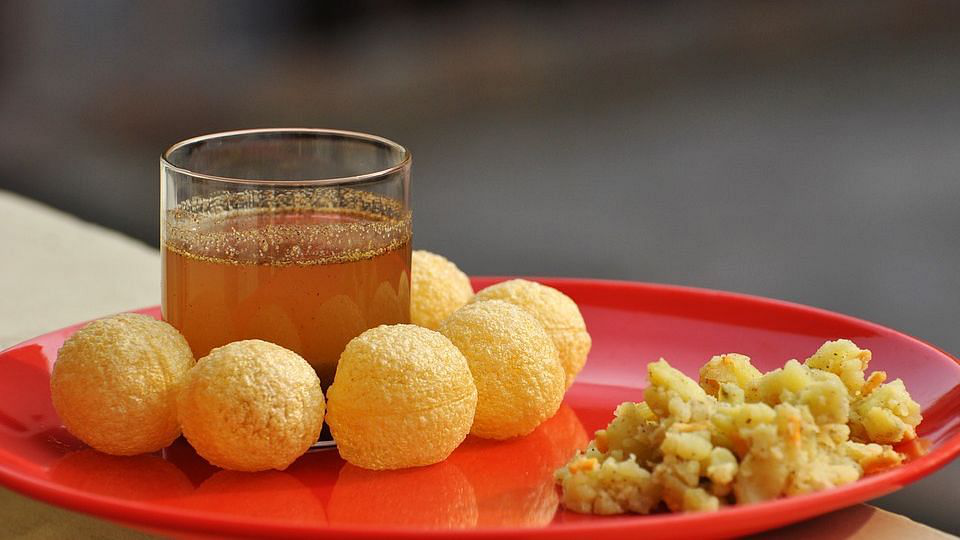

In [ ]:
from PIL import Image
import requests

url = 'https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/126.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = "rajistics/finetuned-indian-food"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

loading feature extractor configuration file https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/preprocessor_config.json from cache at /root/.cache/huggingface/transformers/b1437afde87880322f28c32d8d18e15087a6c0f5ebb3eb64022f3d2e70a30ecc.08655ed7bb323a517686dca7a2716a9fa479de0fa6b11dcf6906fa61e45c4490
Feature extractor ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

loading configuration file https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a8afbe01286a35191e954beb4d8beda8fc345ca5b9a5ed2e74fbb65e6d781a95.ec20cfd759c5caf4e631770632302266c6e79548e7f0b0e5f105ea2a6929826e
Model config ViTConfig {
  "_name_or_path": "rajistics/finetuned-indian-food",
  "architectures": [
    "ViTForImageClassifi

In [ ]:
# prepare image for the model
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: paani_puri


Looks like our model got it correct! 

In [ ]:
from transformers import pipeline
pipe = pipeline("image-classification", "rajistics/finetuned-indian-food")

loading configuration file https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a8afbe01286a35191e954beb4d8beda8fc345ca5b9a5ed2e74fbb65e6d781a95.ec20cfd759c5caf4e631770632302266c6e79548e7f0b0e5f105ea2a6929826e
Model config ViTConfig {
  "_name_or_path": "rajistics/finetuned-indian-food",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "burger",
    "1": "butter_naan",
    "2": "chai",
    "3": "chapati",
    "4": "chole_bhature",
    "5": "dal_makhani",
    "6": "dhokla",
    "7": "fried_rice",
    "8": "idli",
    "9": "jalebi",
    "10": "kaathi_rolls",
    "11": "kadai_paneer",
    "12": "kulfi",
    "13": "masala_dosa",
    "14": "momos",
    "15": "paani_puri",
    "16": "pakode",
    "17": "pav_bhaji",
    "18": "pizza",
    "19": 

In [ ]:
url = 'https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/126.jpg'
image = Image.open(requests.get(url, stream=True).raw)

pipe(image)

[{'label': 'paani_puri', 'score': 0.9596387147903442},
 {'label': 'chai', 'score': 0.0037827605847269297},
 {'label': 'pakode', 'score': 0.0034946436062455177},
 {'label': 'chole_bhature', 'score': 0.003195039462298155},
 {'label': 'kaathi_rolls', 'score': 0.002916843630373478}]

In [ ]:
pipe = pipeline("image-classification", 
                model=model,
                feature_extractor=feature_extractor)

In [ ]:
pipe(image)

[{'label': 'paani_puri', 'score': 0.9596387147903442},
 {'label': 'chai', 'score': 0.0037827605847269297},
 {'label': 'pakode', 'score': 0.0034946436062455177},
 {'label': 'chole_bhature', 'score': 0.003195039462298155},
 {'label': 'kaathi_rolls', 'score': 0.002916843630373478}]